In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = pd.read_pickle("test_data.pkl")
train = pd.read_pickle("train_data.pkl")

In [3]:
#Assign sar_flag to Y 
Y = train['sar_flag']
#Drop sar_flag from train
train.drop('sar_flag', axis=1, inplace=True)

#Drop sar_flag from test
test.drop('sar_flag', axis=1, inplace=True)

#Check the shape of train and test
print(train.shape)
print(test.shape)

(15313, 17)
(1845, 17)


In [4]:
#Assign the columns to X
X = train
#Drop alert_key and cust_id from X
X.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of X
print(X.shape)

(15313, 15)


In [5]:
#Drop alert_key and cust_id from test
test.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of test
print(test.shape)

(1845, 15)


In [6]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [8]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3032
         1.0       0.00      0.00      0.00        31

    accuracy                           0.99      3063
   macro avg       0.49      0.50      0.50      3063
weighted avg       0.98      0.99      0.98      3063

[[3030    2]
 [  31    0]]


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


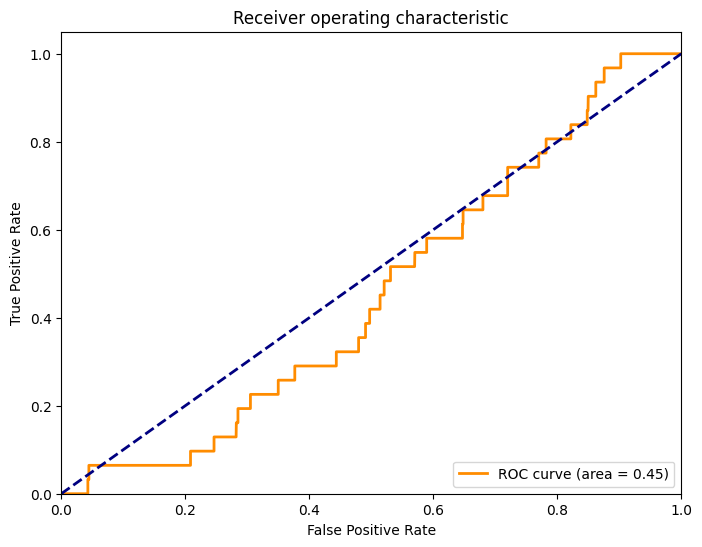

In [10]:
#Create Logistic Regression Model for Fraud Detection
log_reg = LogisticRegression(C=1e5, solver='lbfgs', max_iter=100)
log_reg.fit(X_train, Y_train)
preds = log_reg.predict(X_test)
preds_proba = log_reg.predict_proba(X_test)[:, 1]

#Print Classification Report
print(classification_report(Y_test, preds))
#Print Confusion Matrix
print(confusion_matrix(Y_test, preds))
#Plot ROC_AUC Curve
plot_roc_curve(Y_test, preds_proba)

In [11]:
#Import Isolation Forest
from sklearn.ensemble import IsolationForest
#Import Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 38
Accuracy Score :
0.9875938622265753
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3032
         1.0       0.00      0.00      0.00        31

    accuracy                           0.99      3063
   macro avg       0.49      0.50      0.50      3063
weighted avg       0.98      0.99      0.98      3063



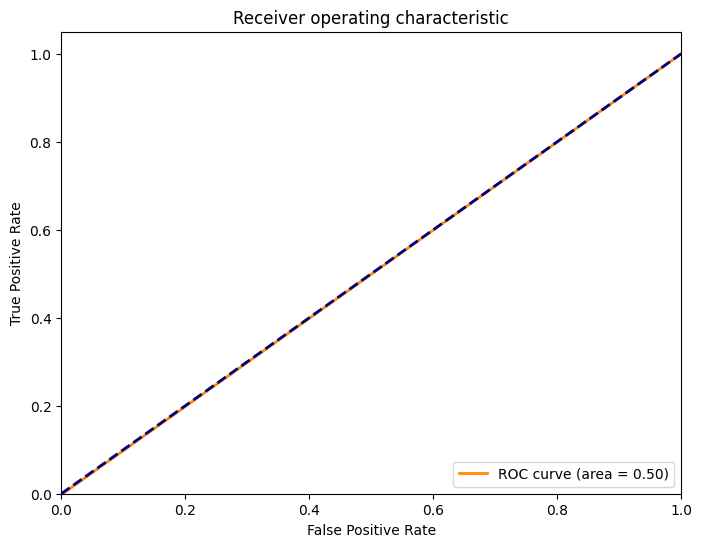

In [12]:
#Create Isolation Forest Model for Fraud Detection
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.001), max_features=1.0)
iso_forest.fit(X_train)
preds = iso_forest.predict(X_test)
preds[preds == 1] = 0
preds[preds == -1] = 1
#Reshape T_Test to 1D Array
Y_test_r = Y_test.to_numpy()


n_errors = (preds != Y_test_r).sum()
print('{}: {}'.format('Isolation Forest', n_errors))
print("Accuracy Score :")
print(accuracy_score(Y_test, preds))
print("Classification Report :")
print(classification_report(Y_test, preds))


#Plot ROC_AUC Curve
plot_roc_curve(Y_test, preds)


In [13]:
#Predict probablity of fraud using models
preds_proba = log_reg.predict_proba(test)[:, 1]

#Predict score samples using Isolation Forest
preds_iso = iso_forest.score_samples(test)


In [14]:
#Print Pred_iso
print(preds_iso)




[-0.53999234 -0.36990451 -0.54455392 ... -0.37905171 -0.4638202
 -0.56038336]


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarn

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3032
         1.0       0.00      0.00      0.00        31

    accuracy                           0.99      3063
   macro avg       0.49      0.50      0.50      3063
weighted avg       0.98      0.99      0.98      3063

Confusion matrix:
 [[3032    0]
 [  31    0]]


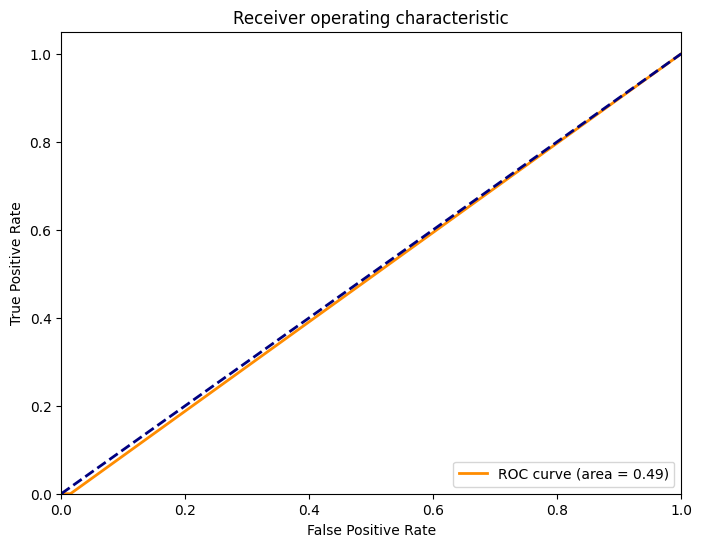

In [15]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3032
         1.0       0.00      0.00      0.00        31

    accuracy                           0.99      3063
   macro avg       0.49      0.50      0.50      3063
weighted avg       0.98      0.99      0.98      3063

Confusion matrix:
 [[3032    0]
 [  31    0]]


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


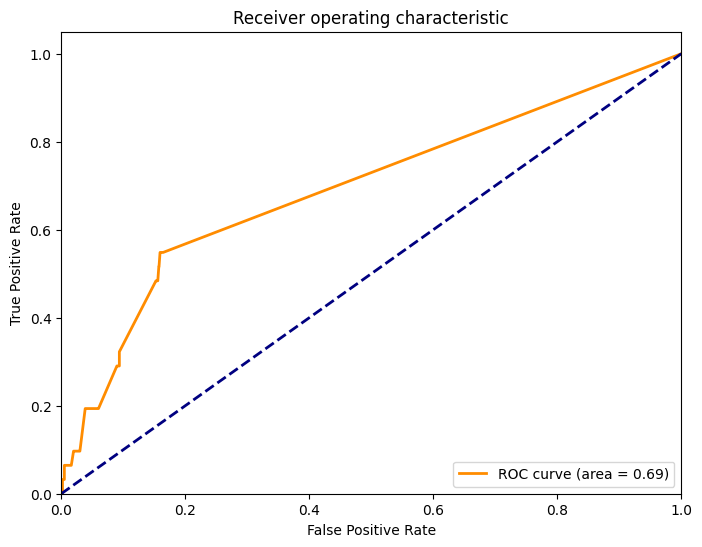

In [16]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:45:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3032
         1.0       0.00      0.00      0.00        31

    accuracy                           0.99      3063
   macro avg       0.49      0.50      0.50      3063
weighted avg       0.98      0.99      0.98      3063

Confusion matrix:
 [[3032    0]
 [  31    0]]


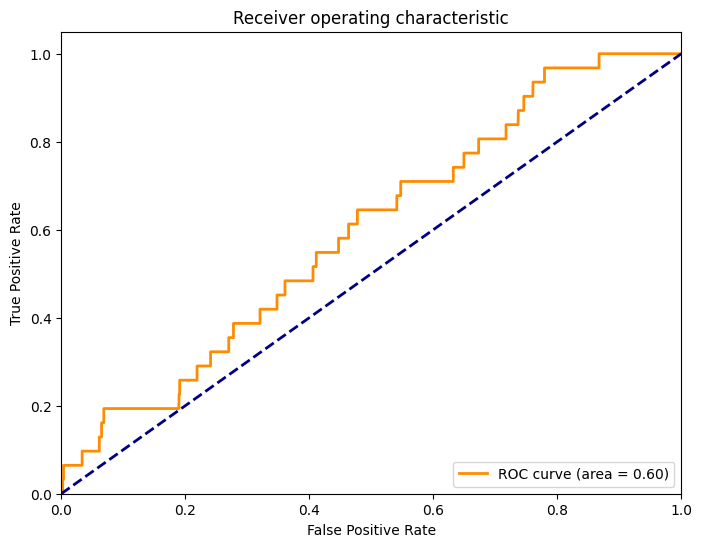

In [17]:
#Import XGBoost Classifier
from xgboost import XGBClassifier
#Create XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic')

xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_dep

[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.50      0.03      0.05        39

    accuracy                           0.99      4758
   macro avg       0.75      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4718    1]
 [  38    1]]


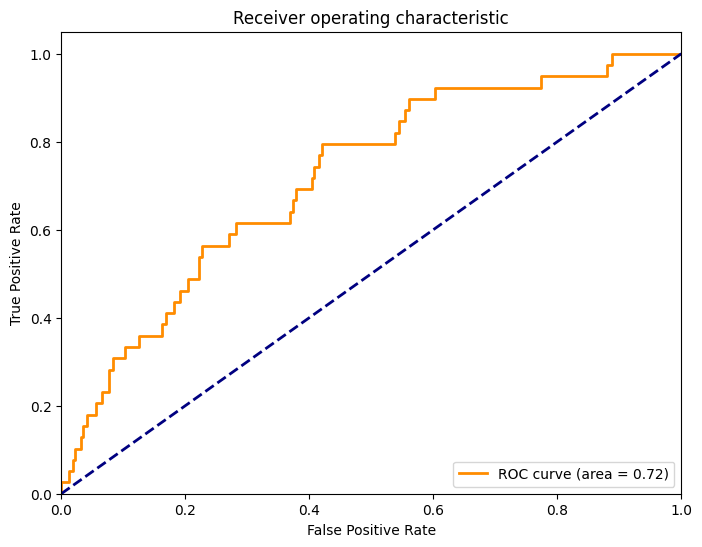

In [60]:
#Create Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rfc), ('xgb', xgb)], voting='soft')
voting_clf.fit(X_train, Y_train)
voting_pred = voting_clf.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, voting_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, voting_pred))
plot_roc_curve(Y_test, voting_clf.predict_proba(X_test)[::,1])
